<a href="https://colab.research.google.com/github/A-76/ML-Projects/blob/main/BankChurnPrediction/BankChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank Churn Prediction **

In [ ]:
import pandas as pd

bank_train_df = pd.read_csv("./train.csv")

# Data Exploration
1.   There are no Null Values in the Dataset
2.   List item



In [ ]:
print(bank_train_df.shape)
bank_train_df.head()

(165034, 14)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
bank_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
bank_train_df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
bank_train_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
len(bank_train_df.Surname.unique())

2797

# Data Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


Not Much to learn from the correlation matrix

[]

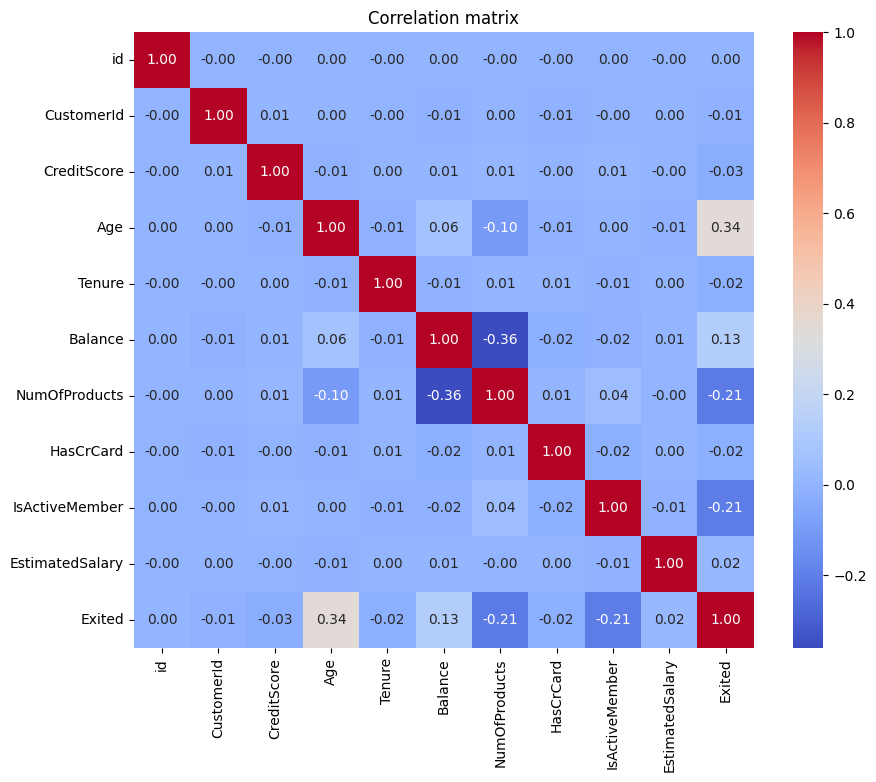

In [ ]:
corr = bank_train_df.corr(numeric_only=True)

plt.figure(figsize = (10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.plot()

More in France than in Spain and Germany.

[]

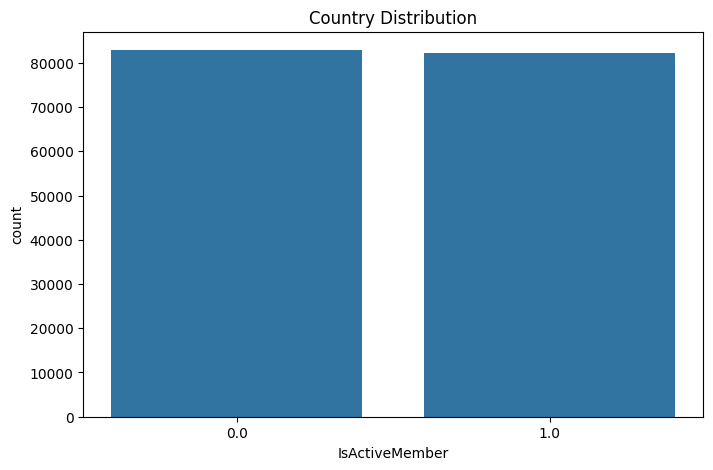

In [ ]:
bank_train_df['Geography'].unique()
plt.figure(figsize = (8,5))
sns.countplot(x='IsActiveMember', data=bank_train_df)
#sns.barplot(data = bank_train_df, x = bank_train_df['HasCrCard'], y = bank_train_df.index,color='blue')
plt.title("Country Distribution")
plt.plot()

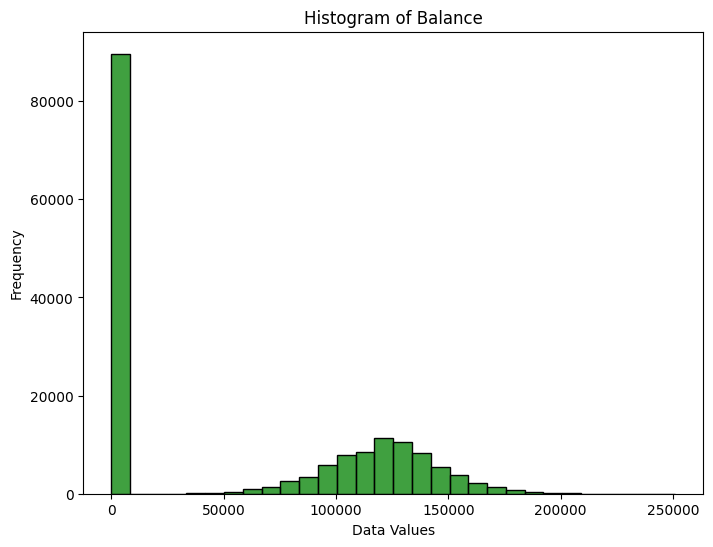

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(data=bank_train_df, x='Balance', bins=30, color='green')  # Plot histogram with 20 bins and kernel density estimation
plt.title('Histogram of Balance')  # Set the titlest
plt.xlabel('Data Values')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.show()  # Show the plot


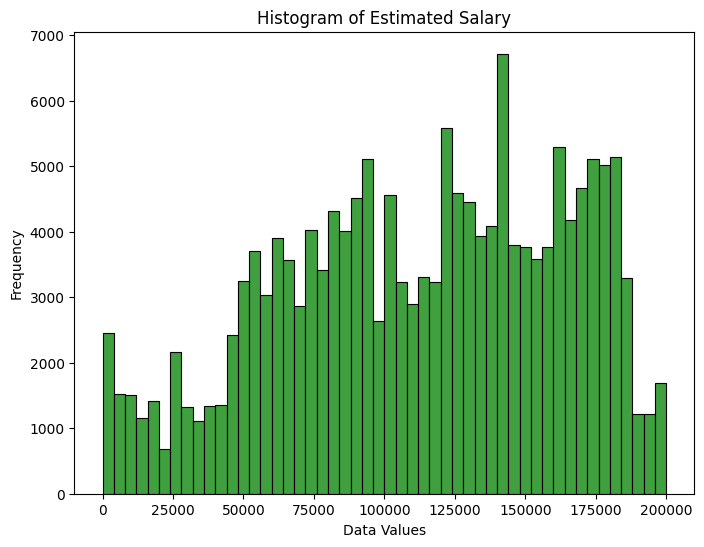

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(data=bank_train_df, x='EstimatedSalary', bins=50, color='green')  # Plot histogram with 20 bins and kernel density estimation
plt.title('Histogram of Estimated Salary')  # Set the titlest
plt.xlabel('Data Values')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.show()  # Show the plot


[]

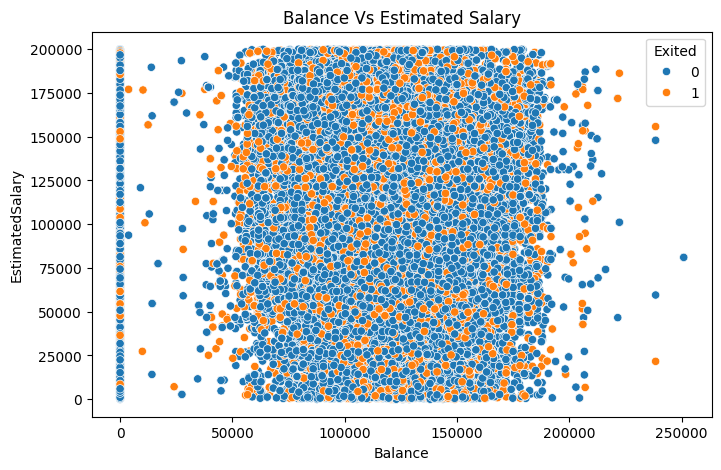

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=bank_train_df,x='Balance',y="EstimatedSalary",hue='Exited')
plt.title("Balance Vs Estimated Salary")
plt.plot()

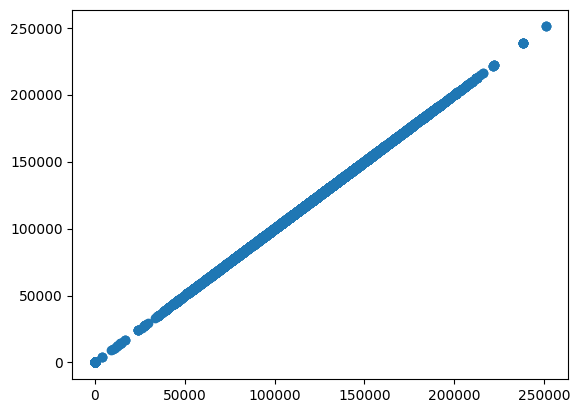

In [ ]:
plt.scatter(bank_train_df['Balance'],bank_train_df['Balance'])
plt.show()

# Statistical Tests

Conducting Chi Square Test between different categorical columns and the exited field

1.   P value for Gender at alpha = 0.05 is 0. We reject the null hypothesis. Gender has a statistically significant effect on exiting a bank
2.   Same for Country, Number of Products, is active member and has credit card



In [ ]:
from scipy.stats import chi2_contingency

data = pd.crosstab(bank_train_df['IsActiveMember'],bank_train_df['Exited'])
print(data)
alpha = 0.05
a = chi2_contingency(data.values)
print(a)

Exited              0      1
IsActiveMember              
0.0             58261  24624
1.0             71852  10297
Chi2ContingencyResult(statistic=7293.40851128207, pvalue=0.0, dof=1, expected_freq=array([[65346.63163348, 17538.36836652],
       [64766.36836652, 17382.63163348]]))


In [ ]:
from scipy.stats import f_oneway

a = bank_train_df[bank_train_df['Exited']==0]['EstimatedSalary']
b = bank_train_df[bank_train_df['Exited']==1]['EstimatedSalary']
statistic, p_value = f_oneway(a,b)
print(p_value)


2.0271773711215722e-14


# Data Cleaning

There are no duplicates and missing values in the dataset

In [ ]:
sum(bank_train_df.duplicated())

0

# Feature Engineering

In [ ]:
bdf = bank_train_df.drop(columns = ['id','CustomerId','Surname'])
bdf.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0




1.   Half the total number of people do not keep their money in this bank. their balance is 0
2.



In [ ]:
#print(len(bdf[bdf['Balance']!=0]))

mean_bal = bdf[bdf['Balance']!=0]['Balance'].mean()
std_val = bdf[bdf['Balance']!=0]['Balance'].std()

def subtract_value(x):
    if x > 0:
        return (x - mean_bal)/std_val
    else:
        return 0

# Subtract a value from entries in the "balance" column greater than 0
value_to_subtract = 10
bdf['new_balance'] = bdf['Balance'].apply(lambda x: subtract_value(x))
bdf['zeroBal'] = (bdf['Balance']!=0)


In [ ]:

data = pd.crosstab(bdf['zeroBal'],bdf['Exited'])
print(data)
alpha = 0.05
a = chi2_contingency(data.values)
print(a)

Exited       0      1
zeroBal              
False    75156  14492
True     54957  20429
Chi2ContingencyResult(statistic=2933.8544935173168, pvalue=0.0, dof=1, expected_freq=array([[70678.58879988, 18969.41120012],
       [59434.41120012, 15951.58879988]]))


In [ ]:
print(bdf.shape)
new_bdf = bdf[((bdf['new_balance']<3)&(bdf['new_balance']>-3))| (bdf['Exited']==1)]
print(new_bdf.shape)
new_bdf = new_bdf.drop(columns=['Balance'])

(165034, 13)
(164801, 13)


People tend to leave between 40-77. we can drop everything after 77.

In [ ]:
new_bdf = new_bdf[new_bdf['Age']>77]

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
new_bdf['CreditScore'] = (new_bdf['CreditScore'] - new_bdf['CreditScore'].min())/(new_bdf['CreditScore'].max() - new_bdf['CreditScore'].min())
new_bdf['Tenure'] = new_bdf['Tenure']/10
new_bdf['NumOfProducts'] = (new_bdf['NumOfProducts'] - new_bdf['NumOfProducts'].min())/(new_bdf['NumOfProducts'].max() - new_bdf['NumOfProducts'].min())
new_bdf['EstimatedSalary'] = (new_bdf['EstimatedSalary'] - new_bdf['EstimatedSalary'].min())/(new_bdf['EstimatedSalary'].max() - new_bdf['EstimatedSalary'].min())
new_bdf['Age'] = (new_bdf['Age'] - new_bdf['Age'].min())/(new_bdf['Age'].max() - new_bdf['Age'].min())
new_bdf[new_bdf['Gender'] =='Male'] = 1
new_bdf[new_bdf['Gender'] =='Female'] = 0


In [ ]:
be_cols = ['Geography']
encoder = ce.BinaryEncoder(verbose=1,cols=be_cols)
bdf_encoded = encoder.fit_transform(new_bdf)

prefix = 'Binary_'
new_cols = []
for col in bdf_encoded.columns:
  if(col in be_cols):
    new_cols.append(prefix+col)
  else:
    new_cols.append(col)

bdf_encoded.columns = new_cols
bdf_encoded.head()

,CreditScore,Geography_0,Geography_1,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_balance,zeroBal
2792,0.0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
10054,1.0,1,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1
12537,1.0,1,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1
13993,1.0,1,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1
17173,1.0,1,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1


In [ ]:
X = bdf_encoded.drop(columns=['Exited'])
y = bdf_encoded['Exited']

# Feature Selection
1. Using Methods like Xgboost trees, RFC trees, select K best to evaluate the feature importance.

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
#X =
# fit the model
model.fit(X.values, y.values)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print(f'{X.columns[i]}, Score: {v}')



CreditScore, Score: 1.0
Geography_0, Score: 0.0
Geography_1, Score: 0.0
Gender, Score: 0.0
Age, Score: 0.0
Tenure, Score: 0.0
NumOfProducts, Score: 0.0
HasCrCard, Score: 0.0
IsActiveMember, Score: 0.0
EstimatedSalary, Score: 0.0
new_balance, Score: 0.0
zeroBal, Score: 0.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# fit the model
model.fit(X.values, y.values)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print(f'{X.columns[i]}, Score: {v}')

CreditScore, Score: 0.09
Geography_0, Score: 0.12
Geography_1, Score: 0.09
Gender, Score: 0.08
Age, Score: 0.04
Tenure, Score: 0.13
NumOfProducts, Score: 0.08
HasCrCard, Score: 0.12
IsActiveMember, Score: 0.08
EstimatedSalary, Score: 0.05
new_balance, Score: 0.03
zeroBal, Score: 0.09


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif


k = 5  # Number of best features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print(f"Selected {k} best features:")
print(selected_features)


Selected 5 best features:
Index(['HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'new_balance',
       'zeroBal'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
X.columns,y

(Index(['CreditScore', 'Geography_0', 'Geography_1', 'Gender', 'Age', 'Tenure',
        'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
        'new_balance', 'zeroBal'],
       dtype='object'),
 2792      0
 10054     1
 12537     1
 13993     1
 17173     1
          ..
 162163    0
 162652    0
 162816    1
 163138    0
 164009    0
 Name: Exited, Length: 86, dtype: int64)

# Model Training and Evaluation
Test a variety of models and find best performing model.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

rfc = RandomForestClassifier(random_state=42)
log_reg = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
xgb = XGBClassifier(random_state=42,enable_categorical=True)

classifiers = {'rfc':rfc,'log_reg':log_reg,'svm':svm}#'xgb':xgb}
# Define the number of folds for cross-validation
k = 5  # Number of folds

# Create a k-fold cross-validation iterator
for clf in classifiers:
  kf = KFold(n_splits=k, shuffle=True, random_state=42)

  # Perform k-fold cross-validation
  scores = cross_val_score(classifiers[clf], X, y, cv=kf, scoring='accuracy')

  # Print the cross-validation scores


  # Calculate and print the mean and standard deviation of the cross-validation scores
  print(f"{clf}")
  print("Cross-validation scores:", scores)
  print("Mean F1:", scores.mean())
  print("Standard deviation of F1:", scores.std())
  print()


rfc
Cross-validation scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0
Standard deviation of F1: 0.0

log_reg
Cross-validation scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0
Standard deviation of F1: 0.0

svm
Cross-validation scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0
Standard deviation of F1: 0.0



# Testing

In [ ]:
test_bdf = pd.read_csv("./test.csv")
test_bdf = test_bdf.drop(columns = ['id','CustomerId','Surname'])
test_bdf.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [ ]:
def subtract_value(x):
    if x > 0:
        return (x - mean_bal)/std_val
    else:
        return 0

# Subtract a value from entries in the "balance" column greater than 0
value_to_subtract = 10
test_bdf['new_balance'] = test_bdf['Balance'].apply(lambda x: subtract_value(x))
test_bdf['zeroBal'] = (test_bdf['Balance']!=0)


In [ ]:
test_bdf['CreditScore'] = (test_bdf['CreditScore'] - test_bdf['CreditScore'].min())/(test_bdf['CreditScore'].max() - test_bdf['CreditScore'].min())
test_bdf['Tenure'] = test_bdf['Tenure']/10
test_bdf['NumOfProducts'] = (test_bdf['NumOfProducts'] - test_bdf['NumOfProducts'].min())/(test_bdf['NumOfProducts'].max() - test_bdf['NumOfProducts'].min())
test_bdf['EstimatedSalary'] = (test_bdf['EstimatedSalary'] - test_bdf['EstimatedSalary'].min())/(test_bdf['EstimatedSalary'].max() - test_bdf['EstimatedSalary'].min())
test_bdf['Age'] = (test_bdf['Age'] - test_bdf['Age'].min())/(test_bdf['Age'].max() - test_bdf['Age'].min())
test_bdf[test_bdf['Gender'] =='Male'] = 1
test_bdf[test_bdf['Gender'] =='Female'] = 0


In [ ]:
be_cols = ['Geography']
encoder = ce.BinaryEncoder(verbose=1,cols=be_cols)
test_bdf_encoded = encoder.fit_transform(test_bdf)

prefix = 'Binary_'
new_cols = []
for col in bdf_encoded.columns:
  if(col in be_cols):
    new_cols.append(prefix+col)
  else:
    new_cols.append(col)

test_bdf_encoded.columns = new_cols
test_bdf_encoded.head()

,CreditScore,Geography_0,Geography_1,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_balance,zeroBal
0,0.0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,1,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,1.0,1,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [ ]:
X_test = test_bdf_encoded.drop(columns=['Exited'])
y_test = test_bdf_encoded['Exited']

# Ideas

1. Chi square test between surname and Exited to check independence
2.   Chi square test between Country and Exited
3. Chi square between has credit card and exited
4. If its an outlier and index is 0 then drop it



In [ ]:
from sklearn.metrics import accuracy_score, f1_score

proba = []
for clf in classifiers:
  classifiers[clf].fit(X,y)
  y_pred = classifiers[clf].predict(X_test)

  if(clf=='log_reg'):
    proba = log_reg.predict_proba(X_test)


  acc = accuracy_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)

  print(f'{clf}')
  print(f"The accuracy is. {acc}")
  print(f"The f1 is. {f1}")
  print()

rfc
The accuracy is. 1.0
The f1 is. 1.0

log_reg
The accuracy is. 1.0
The f1 is. 1.0

svm
The accuracy is. 1.0
The f1 is. 1.0



In [ ]:
proba[:,1]

array([0.01804897, 0.01804897, 0.01804897, ..., 0.98571117, 0.01804897,
       0.01804897])

In [ ]:
len(y_test),sum(y_pred == y_test)

(110023, 110023)

In [ ]:
test_bdf['proba'] = proba[:,1]
new = test_bdf[['id','proba']]

new.to_csv("sub1.csv",index=False)